In [1]:
import tensorflow as ft

In [114]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.boston_housing import load_data 
import numpy as np
from tensorflow.keras.layers import Dropout

### [1] 데이터 로딩

In [14]:
(train_input, train_target), (test_input, test_target) = load_data()

In [17]:
train_input[:1]

array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]])

In [18]:
test_input[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

#### [1-1] 데이터 전처리
- 수치 데이터 : 값의 범위
- 문자 데이터 : 수치화

In [110]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [111]:
ss = StandardScaler()

In [112]:
ss.fit(train_input)

StandardScaler()

In [113]:
train_input_scaled = ss.transform(train_input)
test_input_scaled = ss.transform(test_input)

### [2] NN Model 실습

- (1) 모델 구상
- (2) 모델 생성
- (3) 학습
- (4) 평가
- (5) 테스트

#### [2-1] 모델 구상
- 입력 데이터 => 13개 Features
- 출력 데이터 => 1개 집값

In [19]:
# NN Model의 Layer을 층층이 담아서 관리하는 객체
model = Sequential(name='Boston')

In [20]:
# layer 추가하기
model.add(Dense(1, activation='linear', input_shape=(13,)))

In [47]:
# 모델 구성 확인 => summary()
model.summary()

Model: "Boston"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### [2-2] 모델 생성

- Sequential 클래스의 compile 메서드
- 모델이 도작하기 위해서 필요한 설정
    - 오차 계산 함수 설정 => loss
    - w, B 최적화 방식 설정 => optimizer
    - 모델의 성능 측정 항목 설정 => metrics
- 파라미터 값들
    - str 타입으로 입력 가능
    - 객체 타입으로 입력 가능

In [70]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

#### [2-3] 학습

- fit() 메서드
    - 파라미터
    - 반환값 => History 객체

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
# 검증 데이터에 대한 loss값 3번 연속 개선되지 않으면 학습 중지
stopCB=EarlyStopping(monitor='val_loss', patience=3)

In [101]:
# validation_split 학습데이터 일부를 검증용으로 분리 0.0~1.0
# validation_data=(test_input, test_target) : 테스트 데이터, 테스트 타겟
# 학습시 발생하는 이벤트 처리 함수 등록
# dropout => 0~1.0 (비율)만큼 비활성화 => 과적합 해결하기 위해
result = model.fit(train_input, train_target, epochs=200, batch_size=10, validation_data=(test_input, test_target),
                  callbacks=[stopCB])

Epoch 1/200
41/41 [==============================] - 0s 2ms/step - loss: 34.3608 - mae: 4.3385 - val_loss: 36.1181 - val_mae: 4.2913
Epoch 2/200
41/41 [==============================] - 0s 1ms/step - loss: 34.1096 - mae: 4.4146 - val_loss: 38.2257 - val_mae: 4.3595
Epoch 3/200
41/41 [==============================] - 0s 1ms/step - loss: 34.9354 - mae: 4.3944 - val_loss: 39.6423 - val_mae: 4.4432
Epoch 4/200
41/41 [==============================] - 0s 1ms/step - loss: 35.9255 - mae: 4.4636 - val_loss: 36.2197 - val_mae: 4.2925


In [ ]:
#학습 후 학습 결과 체크 = History 객체 
type(result), result.history

In [103]:
result.params

{'verbose': 1, 'epochs': 200, 'steps': 41}

In [104]:
result.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [105]:
result.history['loss']

[34.360782623291016, 34.10960006713867, 34.93540573120117, 35.925498962402344]

In [106]:
import matplotlib.pyplot as plt

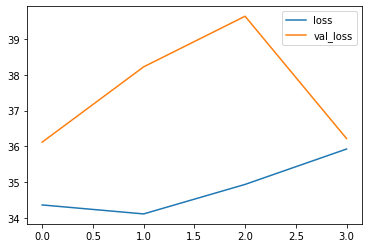

In [107]:
# 시각화
plt.plot(result.epoch,result.history['loss'], label='loss')
plt.plot(result.epoch,result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#### [2-4] 평가

- evaluate() 메서드
    - 파라미터 : test_data, test_target 
    - 반환값 : loss, compile()의 metrics에서 설정한 항목값

In [108]:
eRet=model.evaluate(test_input, test_target)

4/4 [==============================] - 0s 1ms/step - loss: 36.2197 - mae: 4.2925


In [109]:
eRet

[36.219722747802734, 4.29249382019043]

#### [2-5] 예측

- predict